In [145]:
from os import system
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import numpy as np
import pickle
import sys


In [146]:

path="phi_080_all_data.csv"
df = pd.read_csv(path)
le = LabelEncoder()
sc = StandardScaler()
df['polymer']

0       PA
1       PA
2       PA
3       PA
4       PA
      ... 
595    SAN
596    SAN
597    SAN
598    SAN
599    SAN
Name: polymer, Length: 600, dtype: object

In [147]:
df['polymer'] = le.fit_transform(df["polymer"])
df['polymer']

0       1
1       1
2       1
3       1
4       1
       ..
595    11
596    11
597    11
598    11
599    11
Name: polymer, Length: 600, dtype: int32

In [148]:
# df['polymer'] 

In [155]:

df[df.columns[2:]]=sc.fit_transform(df[df.columns[2:]])

In [156]:
X = df[df.columns[8:]].values
Y = df[df.columns[1]].values
name='All values of (nid)'

In [157]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, shuffle=True, stratify=Y)
print("Y_Train: ", y_train)
print("Y_Train Shape: ", y_train.shape)


Y_Train:  [11  7  9  0  5  3  8  2  3  2 10  3  2  4 10  1  0  5 11  3 10  6  1  3
  2  2 11  9  4  5  5 11  7  3  1  8  8  6  1  9  5  6  4  7  9  1  2  4
  0  3  3  7  2 10  4  5  9  5  9  0 11 10  8  1  5 10  8  9  7  2  1  2
  4  1 10  9  7  1  6  0  0  7  0  4 11  8  3  2  7  8  4  5  7  6  2  3
  9  3  7  0 11  3  5  4  2  2  0  2  9 11  5  6  5  2  3  9 10  2 10  6
  7  0  3  3  7  2  9  3  8  3  0  0  9  7  4  0 11  0  5  1 10  4  6  9
  7  6  4  6  7  5 10  5  8  1  0  9  3  6  7 11  5  2  5  7  1  9  2  7
  6  0  7 11 10  1  1  5  6  1  4  6  0 11  1 11  5  3  4  8  1  5  9  5
 11  8  5  1  2  9 11 11  4  2  0 11  8  8  4  3  0  8  9 10 11  4  0 10
  1  7 11  0  1  7  5  2  3  3  6  6  3  9  7  8  3  1  8  8  3  5 11  7
 11 11  8  5  5  2  4 11  0  9 10  6  6  4  7  9 11 10  1  2  0  3  9 10
  5  6 11  8  0  9  6 10  2  1  1 10  5  7  8  8  4 10  1  9  8  1  2  4
  5  7  5  0  6  7  6  0  8  1  6  8  9  9 10  3  4  6 11  3  1  4  8  0
  6 10  4 10  8 10  0  2  5  0  4  1  4  

In [158]:
# kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
# kf


In [159]:
# for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = X[train_index], X[test_index]
#     y_train, y_test = Y[train_index], Y[test_index]
    

In [160]:
print("Y_Train: ", y_train)
print("Y_Train Shape: ", y_train.shape)

print("X_Test Shape: ", x_test.shape)
print("Y_Train Shape: ", y_train.shape)
print("Y_Test Shape: ", y_test.shape)

Y_Train:  [11  7  9  0  5  3  8  2  3  2 10  3  2  4 10  1  0  5 11  3 10  6  1  3
  2  2 11  9  4  5  5 11  7  3  1  8  8  6  1  9  5  6  4  7  9  1  2  4
  0  3  3  7  2 10  4  5  9  5  9  0 11 10  8  1  5 10  8  9  7  2  1  2
  4  1 10  9  7  1  6  0  0  7  0  4 11  8  3  2  7  8  4  5  7  6  2  3
  9  3  7  0 11  3  5  4  2  2  0  2  9 11  5  6  5  2  3  9 10  2 10  6
  7  0  3  3  7  2  9  3  8  3  0  0  9  7  4  0 11  0  5  1 10  4  6  9
  7  6  4  6  7  5 10  5  8  1  0  9  3  6  7 11  5  2  5  7  1  9  2  7
  6  0  7 11 10  1  1  5  6  1  4  6  0 11  1 11  5  3  4  8  1  5  9  5
 11  8  5  1  2  9 11 11  4  2  0 11  8  8  4  3  0  8  9 10 11  4  0 10
  1  7 11  0  1  7  5  2  3  3  6  6  3  9  7  8  3  1  8  8  3  5 11  7
 11 11  8  5  5  2  4 11  0  9 10  6  6  4  7  9 11 10  1  2  0  3  9 10
  5  6 11  8  0  9  6 10  2  1  1 10  5  7  8  8  4 10  1  9  8  1  2  4
  5  7  5  0  6  7  6  0  8  1  6  8  9  9 10  3  4  6 11  3  1  4  8  0
  6 10  4 10  8 10  0  2  5  0  4  1  4  

In [161]:
mlp = MLPClassifier(max_iter=200, random_state=1, verbose=True, activation='relu', batch_size=32, learning_rate_init= 0.0001,
n_iter_no_change=200,hidden_layer_sizes=(512,256, 128, 64,32,16), solver='adam',shuffle=True, early_stopping=True)


In [162]:
print(mlp)

MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128, 64, 32, 16),
              learning_rate_init=0.0001, n_iter_no_change=200, random_state=1,
              verbose=True)


In [163]:
# def start_gridsearch():
#     parameter_space = {
#         'hidden_layer_sizes': [(512, 256, 128), (512, 256, 128, 64), (256, 128, 64), (256, 128, 64, 32)],
#         'activation': ['relu', 'tanh', 'identity', 'logistic'],
#         'solver': ['sgd', 'adam', 'lbfgs'],
#         'alpha':  [0.0001, 0.05, 0.00001],
#         'learning_rate':['constant', 'adaptive']
#     }

#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#     grid_search = clf.fit(x_train, y_train)

#     print('Best parameters found:\n', clf.best_params_)
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# start_gridsearch()

# def one_hot_validation(X, Y):
#     kf = KFold(n_splits=5, shuffle=True)
#     enc = OneHotEncoder()
#     Y = np.array(Y)
#     Y = Y.reshape(len(Y), 1)
#     Y = enc.fit_transform(Y)

#     result = cross_val_score(mlp, X, Y, cv=kf)
#     print('Avg accuracy: {}'.format(result.mean()))


In [164]:
# start_gridsearch()

In [165]:

# one_hot_validation(X, Y)

In [166]:
def performance_measurment(cm):
   
    FP = cm.sum(axis=1) - np.diag(cm) #FP-False Positive 
    FN = cm.sum(axis=0) - np.diag(cm) #FN-False Negatives
    TP = np.diag(cm)                  #TP-True Positive
    TN = cm.sum() - (FP + FN + TP)    #TN-True Negatives

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    ACC1 = np.round((TP+TN)/(TP+FP+FN+TN),decimals=2) #Accuracy
    precision1 = np.round((TP / (TP + FP)),decimals=2) #Precision
    recall1 = np.round((TP / (TP + FN)),decimals=2)   #Recall
    F1_SCORE1 = np.round((2*recall1*precision1)/(recall1+precision1),decimals=2) #F1-Score

    
    return ACC1, precision1, recall1, F1_SCORE1



In [167]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.49538971
Validation score: 0.187500
Iteration 2, loss = 2.43915121
Validation score: 0.208333
Iteration 3, loss = 2.38958011
Validation score: 0.208333
Iteration 4, loss = 2.33796532
Validation score: 0.208333
Iteration 5, loss = 2.28448487
Validation score: 0.208333
Iteration 6, loss = 2.20702424
Validation score: 0.375000
Iteration 7, loss = 2.11422217
Validation score: 0.375000
Iteration 8, loss = 2.02477382
Validation score: 0.416667
Iteration 9, loss = 1.93735142
Validation score: 0.562500
Iteration 10, loss = 1.85815388
Validation score: 0.541667
Iteration 11, loss = 1.78480128
Validation score: 0.520833
Iteration 12, loss = 1.71740408
Validation score: 0.520833
Iteration 13, loss = 1.65899126
Validation score: 0.562500
Iteration 14, loss = 1.61104808
Validation score: 0.562500
Iteration 15, loss = 1.57330819
Validation score: 0.562500
Iteration 16, loss = 1.54246183
Validation score: 0.520833
Iteration 17, loss = 1.51476285
Validation score: 0.541667
Iterat

Iteration 140, loss = 0.33720654
Validation score: 0.791667
Iteration 141, loss = 0.32491957
Validation score: 0.812500
Iteration 142, loss = 0.32394553
Validation score: 0.770833
Iteration 143, loss = 0.31380845
Validation score: 0.791667
Iteration 144, loss = 0.31636666
Validation score: 0.791667
Iteration 145, loss = 0.31870887
Validation score: 0.791667
Iteration 146, loss = 0.31724677
Validation score: 0.812500
Iteration 147, loss = 0.31675424
Validation score: 0.791667
Iteration 148, loss = 0.31398413
Validation score: 0.791667
Iteration 149, loss = 0.31276944
Validation score: 0.791667
Iteration 150, loss = 0.30684048
Validation score: 0.791667
Iteration 151, loss = 0.30524836
Validation score: 0.791667
Iteration 152, loss = 0.31490757
Validation score: 0.770833
Iteration 153, loss = 0.30041068
Validation score: 0.812500
Iteration 154, loss = 0.30367170
Validation score: 0.791667
Iteration 155, loss = 0.30372466
Validation score: 0.770833
Iteration 156, loss = 0.30464297
Validat

C:\Users\shaif\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=32, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128, 64, 32, 16),
              learning_rate_init=0.0001, n_iter_no_change=200, random_state=1,
              verbose=True)

(120,)
(120,)
Combination:All values of (nid)  Accuracy: 0.86
Precision: 0.88  Recall: 0.86  F1-SCORE: 0.85
Combination:All values of (nid)  Accuracy_Matrix: [1.   1.   1.   0.94 0.95 0.98 0.99 0.93 0.94 1.   0.98 1.  ]
Precision_Matrix: [1.   1.   1.   1.   0.62 0.89 0.91 0.57 0.71 1.   0.9  1.  ]
  Recall_MAtrix: [1.  1.  1.  0.3 1.  0.8 1.  0.8 0.5 1.  0.9 1. ]
 F1-SCORE_Matrix: [1.   1.   1.   0.46 0.77 0.84 0.95 0.67 0.59 1.   0.9  1.  ]


C:\Users\shaif\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


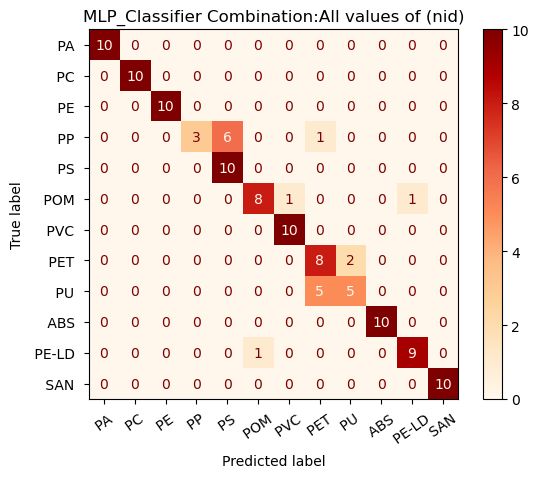

In [168]:


y_pred = mlp.predict(x_test)
print(y_test.shape)
print(y_pred.shape)
precision=round(precision_score(y_test, y_pred,average='weighted'),2)
recall=round(recall_score(y_test, y_pred,average='weighted'),2)
accuracy=round(accuracy_score(y_test, y_pred),2)
F1_SCORE=round(f1_score(y_test, y_pred,average='weighted'),2)

cm = confusion_matrix(y_pred, y_test)

ACC1, precision1, recall1, F1_SCORE1 = performance_measurment(cm)
degrees = 35

class_names = [" PA ", " PC ", " PE ", " PP ", " PS "," POM "," PVC "," PET "," PU "," ABS "," PE-LD "," SAN "]
plot_confusion_matrix(mlp, x_test, y_test,display_labels=class_names,xticks_rotation=degrees,cmap=plt.cm.OrRd)
plt.title("MLP_Classifier Combination:" + str(name))
print("Combination:" + str(name) +"  Accuracy: " + str(accuracy) +  "\nPrecision: "+ str(precision)+"  Recall: "+ str(recall)  + "  F1-SCORE: "+ str(F1_SCORE))
print("Combination:" + str(name) +"  Accuracy_Matrix: " + str(ACC1) +  "\nPrecision_Matrix: "+ str(precision1) +"\n  Recall_MAtrix: "+ str(recall1) + "\n F1-SCORE_Matrix: "+ str(F1_SCORE1))

plt.savefig("phi_mlp_080.png")
#plt.savefig(r'C:\pyyy\auswertung\polymers\MLP_without_early_stopping\\' +name+"_mlp_classifier_without_early_stopping.png")

In [141]:
# def start_gridsearch():
#     parameter_space = {
#         'hidden_layer_sizes': [(512, 256, 128), (512, 256, 128, 64), (256, 128, 64), (256, 128, 64, 32)],
#         'activation': ['relu', 'tanh', 'identity', 'logistic'],
#         'solver': ['sgd', 'adam', 'lbfgs'],
#         'alpha':  [0.0001, 0.05, 0.00001],
#         'learning_rate':['constant', 'adaptive']
#     }

#     clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
#     grid_search = clf.fit(x_train, y_train)

#     print('Best parameters found:\n', clf.best_params_)
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# start_gridsearch()

In [142]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# np.argmax(pred,axis=1)
# Cross-validate
# Use for StratifiedKFold classification
kf = StratifiedKFold(5, shuffle=True, random_state=42) 
    
oos_y = []
oos_pred = []
fold = 0

# Must specify y StratifiedKFold for
for train, test in kf.split(x,df['product']):  
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    
    model = Sequential()
    # Hidden 1
    model.add(Dense(50, input_dim=x.shape[1], activation='relu')) 
    model.add(Dense(25, activation='relu')) # Hidden 2
    model.add(Dense(y.shape[1],activation='softmax')) # Output
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),
              verbose=0, epochs=EPOCHS)
    
    pred = model.predict(x_test)
    
    oos_y.append(y_test)
    # raw probabilities to chosen class (highest probability)
    pred = np.argmax(pred,axis=1) 
    oos_pred.append(pred)  

    # Measure this fold's accuracy
    y_compare = np.argmax(y_test,axis=1) # For accuracy calculation
    score = metrics.accuracy_score(y_compare, pred)
    print(f"Fold score (accuracy): {score}")

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
oos_y_compare = np.argmax(oos_y,axis=1) # For accuracy calculation

score = metrics.accuracy_score(oos_y_compare, oos_pred)
print(f"Final score (accuracy): {score}")    
    
# Write the cross-validated prediction
oos_y = pd.DataFrame(oos_y)
oos_pred = pd.DataFrame(oos_pred)
oosDF = pd.concat( [df, oos_y, oos_pred],axis=1 )
#oosDF.to_csv(filename_write,index=False)

NameError: name 'x' is not defined